In [1]:
#[0]코드개요
#목적   : 자동차 연비 예측
#학습법 : 회귀학습
#이유   : 여러가지 변수들에 의해 자동차의 연비를 예측하는 선형적인 모델이므로,
#         4시간 공부->80점, 6시간공부->90점 5시간->(예측) 식으로 예측하는, 선형적 예측이 가능한 회귀학습이 적합.

#"데이터는 갤런 당 마일 단위의 도시 순환 연료 소비에 관한 것으로, 
#3 개의 다중 값 개별속성 및 5 개의 연속 속성 측면에서 예측됩니다 ." (1993) 퀸란

#           |     연속적인 값                 |   다중 값                   |   이외 값
#-----------|---------------------------------|-----------------------------|---------------------------------------------------
# 분석에서  |  1.mpg : 연속                   |   2.실린더 : 다중 값 이산   |  9.자동차 이름 : 문자열 (각 인스턴스에 대해 고유함)
#  활용함   |  3.변위(displacement) : 연속    |                             |
#           |  5.무게 : 연속                  |                             |
#-----------|---------------------------------|-----------------------------|---------------------------------------------------
# 분석에서  |  4.마력 : 연속                  |  7.모델 연도 : 다중 값 이산 |
# 활용않음? |  6.가속 : 연속                  |  8.원산지 : 다중 값 이산    |
#-----------|---------------------------------|-----------------------------|---------------------------------------------------


#[1]준비과정============================================================================================
#준비-1.임포트
#준비-2.데이터 로드
#준비-3.데이터 정제
#     3.1 데이터가 누락된 행 삭제(생략/정보 누락행 없음.)
#     3.2. 원-핫 인코딩으로 변환 & 각 국가별 칼럼으로 구분
#     3.2.1. 원-핫 인코딩으로 구분실시.
#     3.2.2. 각 국가별 칼럼생성하여 해당 국가별로 구분하도록 처리.


#[2]회귀학습과정============================================================================================
#회귀학습-1.데이터셋을 훈련 세트와 테스트 세트로 분할하기
#회귀학습-2.데이터 조사하기(산점도 행렬로 데이터 시각화)
#회귀학습-3.특성과 레이블 분리하기(레이블 예측하고자 모델을 훈련하는 것.)
#           클래스(결과값) 역할을 해주는 mpg값을 예측하도록 하고자 분류.
#회귀학습-4.데이터 정규화


#[3]모델 예측 및 결론============================================================================================
#모델-1.모델 만들기
#모델-2.모델 확인
#모델-3.모델 훈련
#예측


In [2]:
#준비-1.임포트------------------------------------------------------------------------------------------------------------
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
#준비-2.데이터로드------------------------------------------------------------------------------------------------------------
dataset = pd.read_csv("C:/sourceTree/DataScience/ICT/Py_Project/20201209-day38/auto-mpg.data",delim_whitespace=True, 
                    names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"] )
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
#준비-3.데이터 정제------------------------------------------------------------------------------------------------------------

In [5]:
#준비-3.1 데이터가 누락된 행 삭제
#생략. dataset.isna().sum()으로 확인결과 사용한 데이터에서 누락된 사항이 없음.
#dataset.isna().sum()
#누락된 행 없으므로 dataset = dataset.dropna()도 생략.
#dataset = dataset.dropna()

In [6]:
#준비-3.2 원-핫 인코딩으로 변환 & 각 국가별 칼럼으로 구분
# [자료의 설명]'Origin'(생산국가)은 범주형(미국,유럽,일본)이기에 원핫인코딩으로 구별을 용이하게 하고자 함.

#3.2.1. 원-핫 인코딩으로 구분실시.
origin = dataset.pop('origin')
origin

#3.2.2. 각 국가별 칼럼생성하여 해당 국가별로 구분하도록 처리.
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europe,Japan
393,27.0,4,140.0,86.00,2790.0,15.6,82,ford mustang gl,1.0,0.0,0.0
394,44.0,4,97.0,52.00,2130.0,24.6,82,vw pickup,0.0,1.0,0.0
395,32.0,4,135.0,84.00,2295.0,11.6,82,dodge rampage,1.0,0.0,0.0
396,28.0,4,120.0,79.00,2625.0,18.6,82,ford ranger,1.0,0.0,0.0
397,31.0,4,119.0,82.00,2720.0,19.4,82,chevy s-10,1.0,0.0,0.0


In [7]:
#[2]회귀학습과정============================================================================================

In [8]:
#회귀학습-1.데이터셋을 훈련 세트와 테스트 세트로 분할하기
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [9]:
train_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europe,Japan
65,14.0,8,351.0,153.0,4129.0,13.0,72,ford galaxie 500,1.0,0.0,0.0
132,25.0,4,140.0,75.00,2542.0,17.0,74,chevrolet vega,1.0,0.0,0.0
74,13.0,8,302.0,140.0,4294.0,16.0,72,ford gran torino (sw),1.0,0.0,0.0
78,21.0,4,120.0,87.00,2979.0,19.5,72,peugeot 504 (sw),0.0,1.0,0.0
37,18.0,6,232.0,100.0,3288.0,15.5,71,amc matador,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
207,20.0,4,130.0,102.0,3150.0,15.7,76,volvo 245,0.0,1.0,0.0
279,29.5,4,98.0,68.00,2135.0,16.6,78,honda accord lx,0.0,0.0,1.0
227,19.0,6,225.0,100.0,3630.0,17.7,77,plymouth volare custom,1.0,0.0,0.0
148,26.0,4,116.0,75.00,2246.0,14.0,74,fiat 124 tc,0.0,1.0,0.0


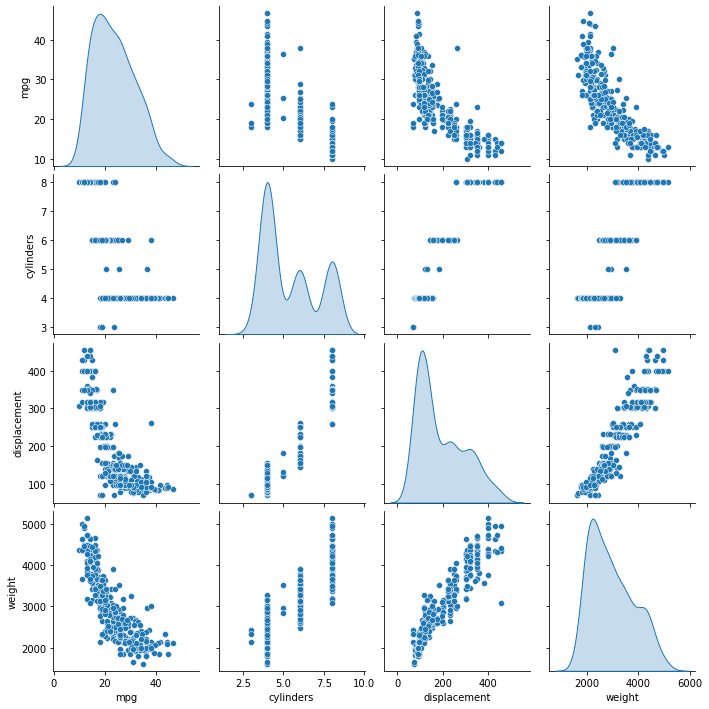

In [10]:
#회귀학습-2.데이터 조사하기(산점도 행렬로 데이터 시각화)
sns.pairplot(train_dataset[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [11]:
#회귀학습-3.특성과 레이블 분리하기(레이블 예측하고자 모델을 훈련하는 것.)
train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')

In [15]:
#회귀학습-4.데이터 정규화
train_stats = train_dataset.describe()
train_stats.pop("mpg")
train_stats = train_stats.transpose()
train_stats
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

KeyError: 'mpg'

In [ ]:
#[3]모델 예측 및 결론============================================================================================

In [ ]:
#모델-1.모델 만들기
model = Sequential()
model.add(Dense(110, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1)) 

In [ ]:
#모델-2.모델 확인
model.summary()

In [ ]:
#모델-3.모델 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mae']) #metrics=['mae'] 평균제곱오차

#학습 자동 중단 설정
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor="mae", patience=10)

seed=123
np.random.seed(seed)
tf.random.set_seed(seed)
hist = model.fit(xtrain, ytrain, epochs=100, batch_size=16, callbacks=[es])


print("loss:"+str(hist.history['loss']) )
print("MAE:"+str(hist.history['mae']) )




In [ ]:
#예측
res = model.evaluate(xtest,ytest,batch_size=32)
print("loss:",res[0],"mae",res[1])